# **TikTok Project**

## **Case Study**
TikTok a Social Media Giant wants to reduce the backlog of user reports and prioritize them more efficiently.

Our **Goal** in this Project is reduce the backlog of user reports and prioritize them more efficiently and we aim to achieve this Goal by Building Prediction Models that'll be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

The following Prediction Models will be built and results evaluated to choose our Champion Model

* Logeistic Reegression Model
* Tree Base Model

**The purpose** of this model is to mitigate misinformation in videos on the TikTok platform.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them and draw conclusions

## **Pace: Plan**
This is the First Stage of our PACE(Plan Analyze Construct & Execute) strategy formula

In this stage, we'll re-study the **Case Study** and try to familiarize ourselves with the Fields present in the Dataset to know have an indepth understanding of how relevant each of them are to the actualisation of the Target.



**Business need and modeling objective**

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, this means that many videos get reported&mdash;too many to be individually reviewed by a human moderator.

Analysis indicates that when authors do violate the terms of service, they're much more likely to be presenting a claim than an opinion. Therefore, it is useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to Predictionlearning model to help identify claims and opinions. Videos that are labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos that are labeled as claims will be further sorted by a downstream process to determine whether they should get prioritized for review. For example, perhaps videos that are classified as claims would then be ranked by how many times they were reported, then the top x% would be reviewed by a human each Prediction day.

 learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

**Modeling design and target variable**

The data dictionary shows that there is a column called `claim_status`. This is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. In other words, for each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary class.

**Select an evaluation metric**

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:

  - **False positives:** When the model predicts a video is a claim when in fact it is an opinion
  - **False negatives:** When the model predicts a video is an opinion when in fact it is a claim



**1. What are the ethical implications of building the model?**
In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed _and_ it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.

Because it's more important to minimize false negatives, the model evaluation metric will be **recall**.

## task 1. Imports

*   Import packages
*   Load dataset

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample


# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

Load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")
data.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

## **PACE: Analyze**

In this Stage, we will  Analyze the dataset to achieve the following 

1) identify data anomalies such as outliers and class imbalance that might affect the modeling;

2) to verify model assumptions such as no severe multicollinearity.
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2a. Explore data with EDA**

Analyze the data and check for and handle missing values and duplicates.

#### Data Shape
Get the number of rows and columns in the dataset.

In [3]:
# Get number of rows and columns
data.shape

(19382, 12)

#### Data types contained in the dataset
Get the data types of the columns.

In [4]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

#### Basic Infos about the dataset
Get basic information about the dataset.

In [5]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


#### Basic Statistics in the dataset
Lets generate basic descriptive statistics about the dataset.

In [6]:
# Generate basic descriptive stats
data.describe()

#      video_id  video_duration_sec  video_view_count  \
count  19382.000000  1.938200e+04        19382.000000      19084.000000   
mean    9691.500000  5.627454e+09           32.421732     254708.558688   
std     5595.245794  2.536440e+09           16.229967     322893.280814   
min        1.000000  1.234959e+09            5.000000         20.000000   
25%     4846.250000  3.430417e+09           18.000000       4942.500000   
50%     9691.500000  5.618664e+09           32.000000       9954.500000   
75%    14536.750000  7.843960e+09           47.000000     504327.000000   
max    19382.000000  9.999873e+09           60.000000     999817.000000   

       video_like_count  video_share_count  video_download_count  \
count      19084.000000       19084.000000          19084.000000   
mean       84304.636030       16735.248323           1049.429627   
std       133420.546814       32036.174350           2004.299894   
min            0.000000           0.000000              0.000000   
25%          810.750000         115.000000              7.000000   
50%         3403.500000         717.000000             46.000000   
75%       125020.000000       18222.000000           1156.250000   
max       657830.000000      256130.000000          14994.000000   

       video_comment_count  
count         19084.000000  
mean            349.312146  
std             799.638865  
min               0.000000  
25%               1.000000  
50%               9.000000  
75%             292.000000  
max            9599.000000

#### Missing values 
Lets check for and handle missing values.

In [118]:
# Check for missing values
data.isna().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
text_length                 0
dtype: int64

We have seen the columns with missing values and the proportion of missing values to the total rows is less than 2% as shown below

In [8]:
round(298/data.shape[0]*100,2)


1.54


#### Drop Missing values
We will drop the rows with the missing values as they are less than 2% of the data rows



In [9]:
# Drop rows with missing values
data = data.dropna(axis=0)

In [10]:
#re checking the size of the data after droping NaN
data.shape

(19084, 12)

#### Check Duplicates 
Check for and handle duplicates.

In [11]:
# Check for duplicates
data.duplicated().sum()

0

No duplicates are contained in the data

### Check for Outliers

**1. Checking for outliers in ` video_duration_sec` using a Boxplot visua**

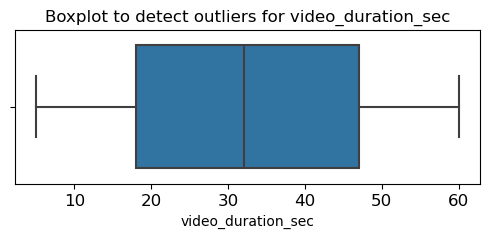

In [12]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_duration_sec', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_duration_sec'])
plt.show()

#### Observation
 No Outliers in `video_duration_sec`

**2. Checking for outliers in `video_view_count` using a Boxplot visua**

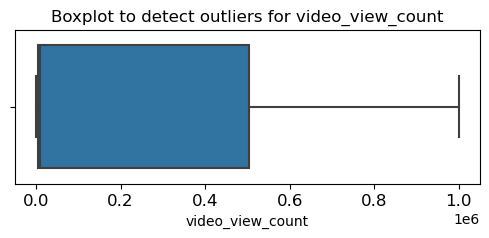

In [13]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_view_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_view_count'])
plt.show()

#### Observation
 No Outliers in `video_view_count`

**3. Checking for outliers in `video_like_count` using a Boxplot visua**

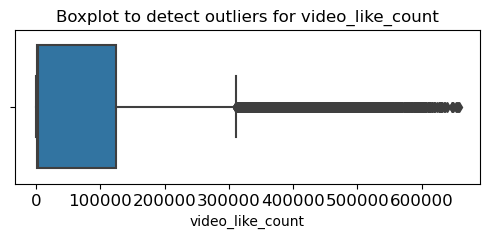

In [14]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_like_count'])
plt.show()

#### Observation
 There are Outliers in `video_like_count`

#### Handle Outliers
Logistic Regresion model does not allow support Outliers therefore we re going to convert outliers into Upper or Lower limit values

In [15]:
# Check for and handle outliers
df = data.copy()
percentile25 = df["video_like_count"].quantile(0.25)
percentile75 = df["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_like_count"] > upper_limit, "video_like_count"] = upper_limit

To confirm that outliers have been removed

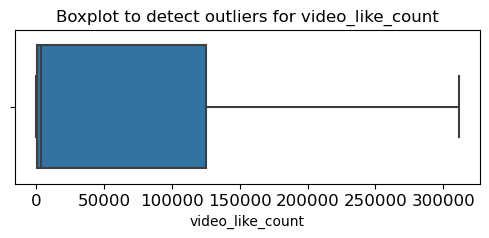

In [16]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_like_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_like_count'])
plt.show()

#### Observation
No Outlier in `video_like_count`

**4. Checking for outliers in `video_comment_count` using a Boxplot visua**

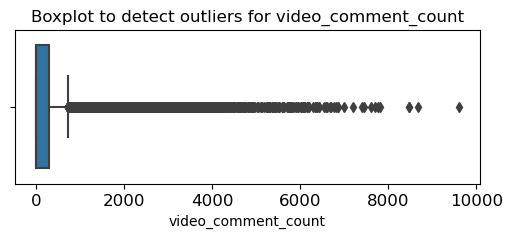

In [17]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=data['video_comment_count'])
plt.show()

#### Observation
 There are Outliers in `video_comment_count`

#### Handle Outliers
Logistic Regresion model does not allow support Outliers therefore we re going to convert outliers into Upper or Lower limit values

In [18]:

# Check for and handle outliers
df = data.copy()
percentile25 = df["video_comment_count"].quantile(0.25)
percentile75 = df["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

df.loc[df["video_comment_count"] > upper_limit, "video_comment_count"] = upper_limit

To confirm that Outliers have been removed from the dataset

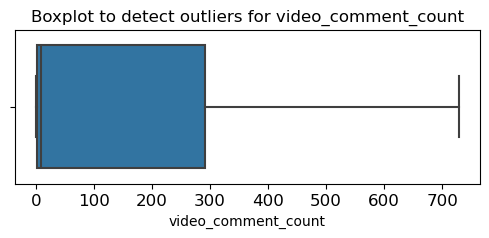

In [19]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(6,2))
plt.title('Boxplot to detect outliers for video_comment_count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df['video_comment_count'])
plt.show()

#### Observation
No Outlier in `video_comment_count`

### Class Balance

In [20]:
# Check class balance
df["claim_status"].value_counts(normalize=True)*100

claim_status
claim      50.345839
opinion    49.654161
Name: proportion, dtype: float64

There is a good balance between the outcomes of the `claim_status` column.

### **Task 2b. Examine correlations**

### Feature Engineering

Add the `Text lenght` Feature in the dataset for counting the text lenght of the  `video_transcription_text` feature. This will make `video_transcription_text` make contributions in the Prediction Model

In [21]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
df["text_length"] = df["video_transcription_text"].apply(func=lambda text: len(text))
df.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  text_length  
0                   1.0                  0.0           97  
1                1161.0                684.0          107  
2                 833.0                329.0          137  
3                1234.0                584.0          131  
4                 547.0                152.0          128

#### Correlation Heatmap Visual
We'll create a Correlation Heatmap from our data. This performs best when the columns are Numeric therefore we will drop non-numeric variables from our data.

In [22]:
# Code a correlation matrix to help determine most correlated variables
df.corr(numeric_only=True)

#  video_id  video_duration_sec  \
#                     1.000000 -0.003590           -0.000145   
video_id             -0.003590  1.000000            0.008460   
video_duration_sec   -0.000145  0.008460            1.000000   
video_view_count     -0.668047  0.000217            0.008481   
video_like_count     -0.540852  0.000236            0.011567   
video_share_count    -0.451713 -0.002721            0.011560   
video_download_count -0.447729  0.002155            0.013078   
video_comment_count  -0.567260  0.004389           -0.005260   
text_length          -0.226844  0.000723           -0.001580   

                      video_view_count  video_like_count  video_share_count  \
#                            -0.668047         -0.540852          -0.451713   
video_id                      0.000217          0.000236          -0.002721   
video_duration_sec            0.008481          0.011567           0.011560   
video_view_count              1.000000          0.804322           0.665635   
video_like_count              0.804322          1.000000           0.825789   
video_share_count             0.665635          0.825789           1.000000   
video_download_count          0.664222          0.823554           0.679910   
video_comment_count           0.705983          0.747944           0.620466   
text_length                   0.230212          0.180193           0.147223   

                      video_download_count  video_comment_count  text_length  
#                                -0.447729            -0.567260    -0.226844  
video_id                          0.002155             0.004389     0.000723  
video_duration_sec                0.013078            -0.005260    -0.001580  
video_view_count                  0.664222             0.705983     0.230212  
video_like_count                  0.823554             0.747944     0.180193  
video_share_count                 0.679910             0.620466     0.147223  
video_download_count              1.000000             0.768873     0.146382  
video_comment_count               0.768873             1.000000     0.196472  
text_length                       0.146382             0.196472     1.000000

In [23]:
# to drop non numeric columns from the data

df.corr(numeric_only=True)


#  video_id  video_duration_sec  \
#                     1.000000 -0.003590           -0.000145   
video_id             -0.003590  1.000000            0.008460   
video_duration_sec   -0.000145  0.008460            1.000000   
video_view_count     -0.668047  0.000217            0.008481   
video_like_count     -0.540852  0.000236            0.011567   
video_share_count    -0.451713 -0.002721            0.011560   
video_download_count -0.447729  0.002155            0.013078   
video_comment_count  -0.567260  0.004389           -0.005260   
text_length          -0.226844  0.000723           -0.001580   

                      video_view_count  video_like_count  video_share_count  \
#                            -0.668047         -0.540852          -0.451713   
video_id                      0.000217          0.000236          -0.002721   
video_duration_sec            0.008481          0.011567           0.011560   
video_view_count              1.000000          0.804322           0.665635   
video_like_count              0.804322          1.000000           0.825789   
video_share_count             0.665635          0.825789           1.000000   
video_download_count          0.664222          0.823554           0.679910   
video_comment_count           0.705983          0.747944           0.620466   
text_length                   0.230212          0.180193           0.147223   

                      video_download_count  video_comment_count  text_length  
#                                -0.447729            -0.567260    -0.226844  
video_id                          0.002155             0.004389     0.000723  
video_duration_sec                0.013078            -0.005260    -0.001580  
video_view_count                  0.664222             0.705983     0.230212  
video_like_count                  0.823554             0.747944     0.180193  
video_share_count                 0.679910             0.620466     0.147223  
video_download_count              1.000000             0.768873     0.146382  
video_comment_count               0.768873             1.000000     0.196472  
text_length                       0.146382             0.196472     1.000000

Visualize a correlation heatmap of the data.

In [24]:
corr = df[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]].corr(numeric_only=True)
corr.style.background_gradient(cmap='RdBu',vmin =-1, vmax =1).format(precision=3)

# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

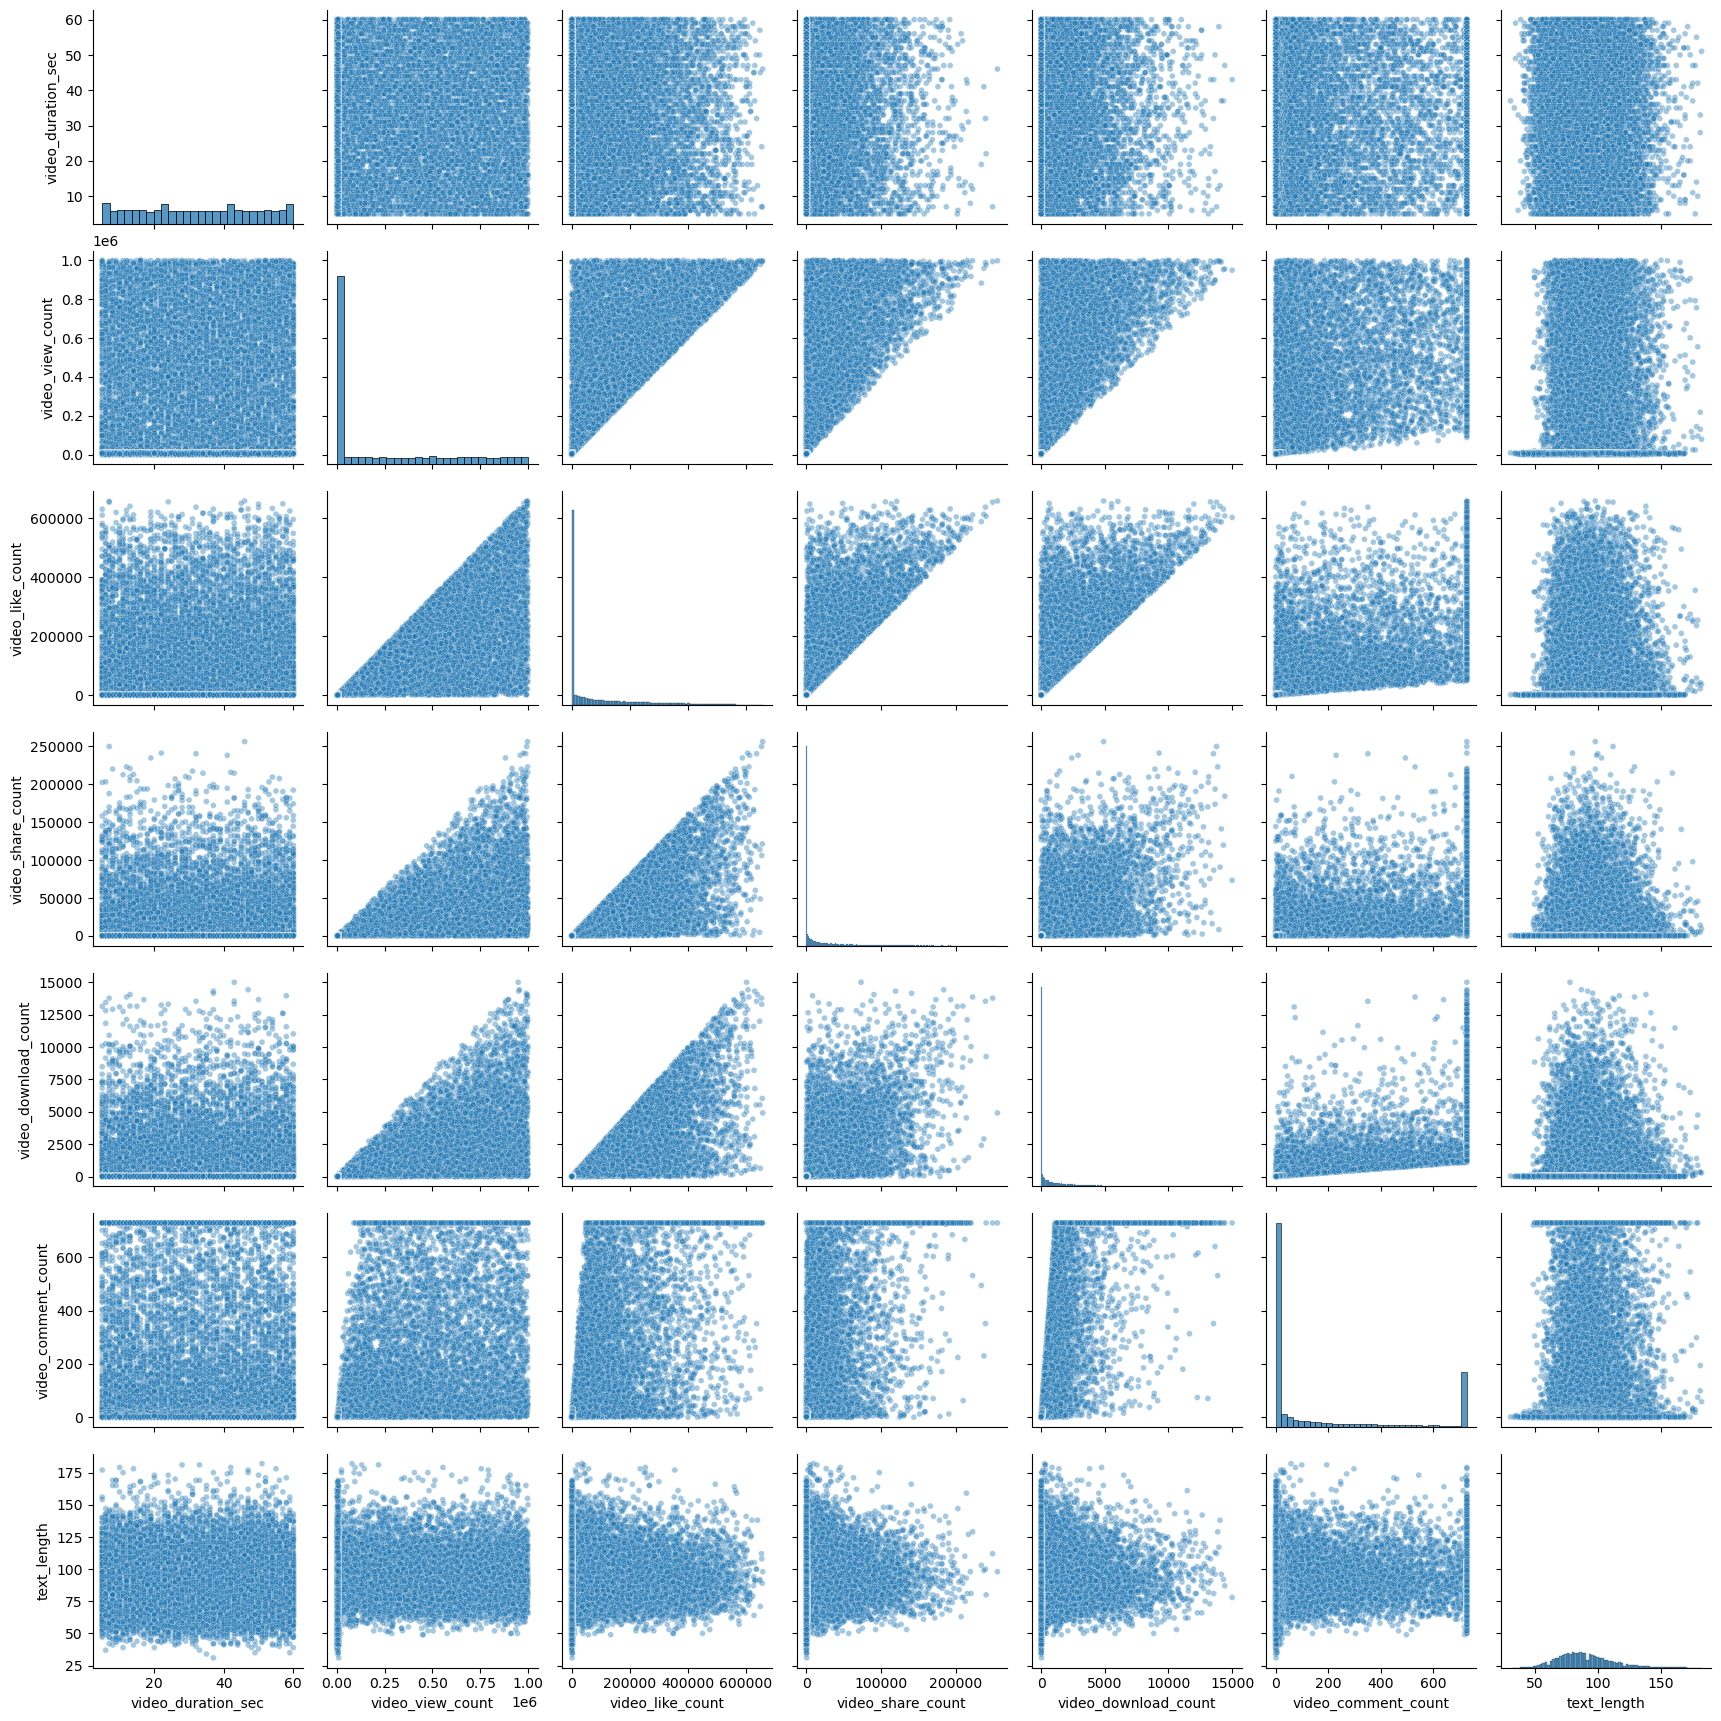

In [25]:
sns.pairplot(df[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]], plot_kws={'alpha':0.4,'size':5})


One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

The above visauls shows that the following pair of variables are strongly correlated: `video_view_count` and `video_like_count` (0.86 correlation coefficient).

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude `video_like_count`. And among the variables that quantify video metrics, you could keep `video_view_count`, `video_share_count`, `video_download_count`, and `video_comment_count` as features.



## **PACE: Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### **Task 3a. Select variables**

Set our Y and X variables.

In [26]:
# Select outcome variable
y = df["claim_status"]

We select the features.

In [27]:
# Select features
X = df[["video_duration_sec", "verified_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

video_duration_sec verified_status author_ban_status  video_view_count  \
0                  59    not verified      under review          343296.0   
1                  32    not verified            active          140877.0   
2                  31    not verified            active          902185.0   
3                  25    not verified            active          437506.0   
4                  19    not verified            active           56167.0   

   video_share_count  video_download_count  video_comment_count  
0              241.0                   1.0                  0.0  
1            19034.0                1161.0                684.0  
2             2858.0                 833.0                329.0  
3            34812.0                1234.0                584.0  
4             4110.0                 547.0                152.0

**Note** The `#` and `video_id` columns are not selected as features here, because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. Also, `video_like_count` is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### **Task 3b. Train-test split**

We split the data into training and testing sets.

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [29]:
# Get shape of each training and testing set
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14313, 7), (4771, 7), (14313,), (4771,))

- The number of features (`7`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`14313`) and testing (`4771`).

### **Task 3c. Encode variables**

#### For the X_train features
Check the data types of the features.

In [30]:
# Check data types
X_train.dtypes

video_duration_sec        int64
verified_status          object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [31]:
# Get unique values in `claim_status`
X_train["verified_status"].unique()

array(['not verified', 'verified'], dtype=object)

In [32]:
# Get unique values in `author_ban_status`
X_train["author_ban_status"].unique()

array(['under review', 'active', 'banned'], dtype=object)

As shown above, the `verified_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

lets Encode categorical features in the training set using an appropriate method.

In [33]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["verified_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

verified_status author_ban_status
8040     not verified      under review
18312        verified            active
7349     not verified            active
2856     not verified            active
16585        verified      under review

In [34]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [35]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [36]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['verified_status_verified', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [37]:
# Display first few rows of encoded training features
X_train_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [38]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

verified_status_verified  author_ban_status_banned  \
0                       0.0                       0.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       1.0                       0.0   

   author_ban_status_under review  
0                             1.0  
1                             0.0  
2                             0.0  
3                             0.0  
4                             1.0

In [39]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["verified_status", "author_ban_status"]).head()

video_duration_sec  video_view_count  video_share_count  \
8040                   34          816695.0             1482.0   
18312                  40             903.0                8.0   
7349                   54          311925.0            27014.0   
2856                   46          598217.0            75662.0   
16585                  40            2660.0              223.0   

       video_download_count  video_comment_count  
8040                  185.0                 24.0  
18312                   0.0                  0.0  
7349                 4427.0                728.5  
2856                 2947.0                448.0  
16585                   0.0                  0.0

In [40]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `verified_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["verified_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

video_duration_sec  video_view_count  video_share_count  \
0                  34          816695.0             1482.0   
1                  40             903.0                8.0   
2                  54          311925.0            27014.0   
3                  46          598217.0            75662.0   
4                  40            2660.0              223.0   

   video_download_count  video_comment_count  verified_status_verified  \
0                 185.0                 24.0                       0.0   
1                   0.0                  0.0                       1.0   
2                4427.0                728.5                       0.0   
3                2947.0                448.0                       0.0   
4                   0.0                  0.0                       1.0   

   author_ban_status_banned  author_ban_status_under review  
0                       0.0                             1.0  
1                       0.0                             0.0  
2                       0.0                             0.0  
3                       0.0                             0.0  
4                       0.0                             1.0

#### For the y_train features
Check the data type of the outcome variable.

In [41]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [42]:
# Get unique values of outcome variable
y_train.unique()

array(['claim', 'opinion'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [43]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [44]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([0., 1., 0., ..., 1., 1., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [45]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

## **PACE: Execute**

Consider the questions in the your PACE Strategy Document to reflect on the Execute stage.

### **Task 4a. Results and evaluation**

we Evaluate our model.

In [46]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["verified_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

verified_status author_ban_status
3695     not verified            active
11495        verified      under review
7604     not verified            active
12728    not verified            active
875      not verified            active

Encode the true labels of the testing set so it can be compared to the predictions.

In [47]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded

array([[0., 0., 0.],
       [1., 0., 1.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.]])

In [48]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()

verified_status_verified  author_ban_status_banned  \
0                       0.0                       0.0   
1                       1.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   author_ban_status_under review  
0                             0.0  
1                             1.0  
2                             0.0  
3                             0.0  
4                             0.0

In [49]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_test.drop(columns=["verified_status", "author_ban_status"]).head()

video_duration_sec  video_view_count  video_share_count  \
3695                   54          692084.0            16591.0   
11495                  37            5164.0               36.0   
7604                   39          801951.0            57608.0   
12728                  44            6429.0              847.0   
875                    26          555780.0            15348.0   

       video_download_count  video_comment_count  
3695                  622.0                312.0  
11495                  17.0                  1.0  
7604                 8578.0                728.5  
12728                  17.0                  5.0  
875                   252.0                 91.0

In [50]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["verified_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

video_duration_sec  video_view_count  video_share_count  \
0                  54          692084.0            16591.0   
1                  37            5164.0               36.0   
2                  39          801951.0            57608.0   
3                  44            6429.0              847.0   
4                  26          555780.0            15348.0   

   video_download_count  video_comment_count  verified_status_verified  \
0                 622.0                312.0                       0.0   
1                  17.0                  1.0                       1.0   
2                8578.0                728.5                       0.0   
3                  17.0                  5.0                       0.0   
4                 252.0                 91.0                       0.0   

   author_ban_status_banned  author_ban_status_under review  
0                       0.0                             0.0  
1                       0.0                             1.0  
2                       0.0                             0.0  
3                       0.0                             0.0  
4                       0.0                             0.0

Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [51]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [52]:
# Display the predictions on the encoded testing set
y_pred

array([0., 1., 0., ..., 0., 0., 1.])

In [53]:
# Display the true labels of the testing set
y_test

3695       claim
11495    opinion
7604       claim
12728    opinion
875        claim
          ...   
4493       claim
12446    opinion
1173       claim
7165       claim
12388    opinion
Name: claim_status, Length: 4771, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [54]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([0., 1., 0., ..., 0., 0., 1.])

Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [55]:
# Get shape of each training and testing set
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((14313, 8), (14313,), (4771, 8), (4771,))

**Note:** 

- The number of features (`8`) aligns between the training and testing sets.It increased from 7 to 8 because we removed 2 Features `verified_status`, `author_ban_status` and added 3 Features `verified_status_verified`,	`author_ban_status_banned`,	`author_ban_status_under review`
- The number of rows aligns between the features and the outcome variable for training (`14313`) and testing (`4771`).

### **Task 4b. Visualize model results**

Create a confusion matrix to visualize the results of the logistic regression model.

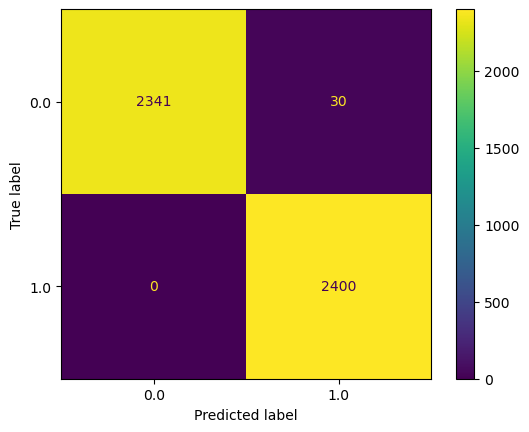

In [56]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

To check for accuracy in the Model 

In [57]:
Accuracy = (2341+2400) / (2341+2400 + 30)

In [58]:
#in percentage 

Accuracy = Accuracy*100
Accuracy

99.3712010060784

**Notes:**

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

**Evaluation Metrics**
we will Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [59]:
# Create classification report for logistic regression model
target_labels = ["claim", "opinion"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

       claim       1.00      0.99      0.99      2371
     opinion       0.99      1.00      0.99      2400

    accuracy                           0.99      4771
   macro avg       0.99      0.99      0.99      4771
weighted avg       0.99      0.99      0.99      4771



**Note:** The classification report above shows that the logistic regression model achieved a precision of 100% and a recall of 99%, and it achieved an accuracy of 99%. Note that the precision and recall scores are taken from the "claim" row of the output because that is the target class that we are most interested in predicting. The "opinion" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### **Task 4c. Interpret model coefficients**

In [60]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

Feature Name  Model Coefficient
0              video_duration_sec          -0.011599
1                video_view_count          -0.000444
2               video_share_count          -0.000683
3            video_download_count           0.015450
4             video_comment_count          -0.099836
5        verified_status_verified           1.146956
6        author_ban_status_banned          -0.211207
7  author_ban_status_under review           0.143074

### **Task 4d. Conclusion**

**Exemplar response:**

Key takeaways:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 84% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 


We developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.

## Modeling Approach A: Tree Based Model
This approach covers the Decision Tree and Random Forest

1. Isolate the outcome variable.


    We are not going to remove Outliers as Tree Based Models are not strict on Outliers. 

    We will use our dataset `data` because it still contain Outliers

In [61]:
data.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  
0                   1.0                  0.0  
1                1161.0                684.0  
2                 833.0                329.0  
3                1234.0                584.0  
4                 547.0                152.0

### **Task 3. Feature engineering**
Extract the length (character count) of each `video_transcription_text` and add this to the dataframe as a new column called `text_length` so that it can be used as a feature in the model.

In [62]:
# Create `text_length` column
data['text_length'] = data['video_transcription_text'].str.len()
data.head()

# claim_status    video_id  video_duration_sec  \
0  1        claim  7017666017                  59   
1  2        claim  4014381136                  32   
2  3        claim  9859838091                  31   
3  4        claim  1866847991                  25   
4  5        claim  7105231098                  19   

                            video_transcription_text verified_status  \
0  someone shared with me that drone deliveries a...    not verified   
1  someone shared with me that there are more mic...    not verified   
2  someone shared with me that american industria...    not verified   
3  someone shared with me that the metro of st. p...    not verified   
4  someone shared with me that the number of busi...    not verified   

  author_ban_status  video_view_count  video_like_count  video_share_count  \
0      under review          343296.0           19425.0              241.0   
1            active          140877.0           77355.0            19034.0   
2            active          902185.0           97690.0             2858.0   
3            active          437506.0          239954.0            34812.0   
4            active           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  text_length  
0                   1.0                  0.0           97  
1                1161.0                684.0          107  
2                 833.0                329.0          137  
3                1234.0                584.0          131  
4                 547.0                152.0          128

Calculate the average `text_length` for claims and opinions.

In [63]:
data[['claim_status', 'text_length']].groupby('claim_status').mean()

text_length
claim_status             
claim           95.376978
opinion         82.722562

Visualize the distribution of `text_length` for claims and opinions using a histogram.

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


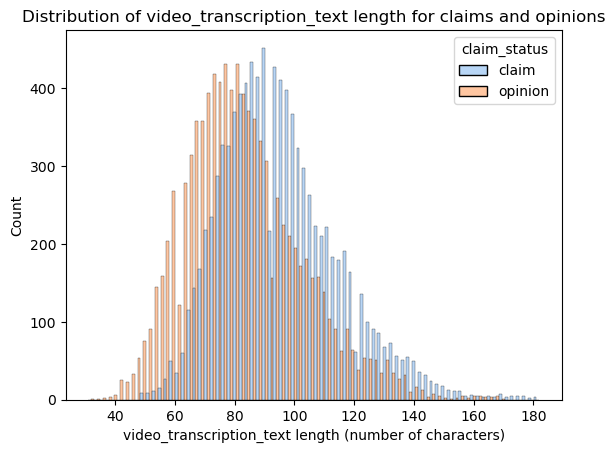

In [64]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for claims and opinions")
plt.show()

#### Observation
Letter count distributions for both claims and opinions are approximately normal with a slight right skew. Claim videos tend to have more characters&mdash;about 13 more on average, as indicated in a previous cell.

**Feature selection and transformation**

#### Encode target and catgorical variables.

In [65]:
X = data.copy()
# Drop unnecessary columns
X = X.drop(['#', 'video_id'], axis=1)
# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1})
# Dummy encode remaining categorical values
X = pd.get_dummies(X,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
X.head()

claim_status  video_duration_sec  \
0             1                  59   
1             1                  32   
2             1                  31   
3             1                  25   
4             1                  19   

                            video_transcription_text  video_view_count  \
0  someone shared with me that drone deliveries a...          343296.0   
1  someone shared with me that there are more mic...          140877.0   
2  someone shared with me that american industria...          902185.0   
3  someone shared with me that the metro of st. p...          437506.0   
4  someone shared with me that the number of busi...           56167.0   

   video_like_count  video_share_count  video_download_count  \
0           19425.0              241.0                   1.0   
1           77355.0            19034.0                1161.0   
2           97690.0             2858.0                 833.0   
3          239954.0            34812.0                1234.0   
4           34987.0             4110.0                 547.0   

   video_comment_count  text_length  verified_status_verified  \
0                  0.0           97                     False   
1                684.0          107                     False   
2                329.0          137                     False   
3                584.0          131                     False   
4                152.0          128                     False   

   author_ban_status_banned  author_ban_status_under review  
0                     False                            True  
1                     False                           False  
2                     False                           False  
3                     False                           False  
4                     False                           False

### **Task 4. Split the data**

We will Assign target variable.

**Exemplar response:**
In this case, the target variable is `claim_status`.
* 0 represents an opinion
* 1 represents a claim

In [66]:
# Isolate target variable
y = X['claim_status']

Isolate the features.

In [67]:
# Isolate features
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

video_duration_sec                           video_transcription_text  \
0                  59  someone shared with me that drone deliveries a...   
1                  32  someone shared with me that there are more mic...   
2                  31  someone shared with me that american industria...   
3                  25  someone shared with me that the metro of st. p...   
4                  19  someone shared with me that the number of busi...   

   video_view_count  video_like_count  video_share_count  \
0          343296.0           19425.0              241.0   
1          140877.0           77355.0            19034.0   
2          902185.0           97690.0             2858.0   
3          437506.0          239954.0            34812.0   
4           56167.0           34987.0             4110.0   

   video_download_count  video_comment_count  text_length  \
0                   1.0                  0.0           97   
1                1161.0                684.0          107   
2                 833.0                329.0          137   
3                1234.0                584.0          131   
4                 547.0                152.0          128   

   verified_status_verified  author_ban_status_banned  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   author_ban_status_under review  
0                            True  
1                           False  
2                           False  
3                           False  
4                           False

#### **Task 5: Create train/validate/test sets**

We Split data into training and testing sets, 80/20.

In [68]:
# Split the data into training and testing sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [69]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [70]:
# Get shape of each training, validation, and testing set
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 11), (3817, 11), (3817, 11), (11450,), (3817,), (3817,))

**Notes:**
- The number of features (`11`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`11,450`) and both validation and testing data (`3,817`).

### **Tokenize text column**

This concept comes into play when we re working on natural language processing (NLP), because of the nature of the data provided in this TikTok project, we'll use it to derive impact from our text column.

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [71]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec

CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

Fit the vectorizer to the training data (generate the n-grams) and transform it (tally the occurrences). Only fit to the training data, not the validation or test data.

In [72]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X_train['video_transcription_text']).toarray()
count_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

colleague discovered  colleague learned  colleague read  discovered news  \
0                     0                  0               0                0   
1                     0                  0               0                0   
2                     0                  0               0                0   
3                     0                  0               0                0   
4                     0                  0               0                0   

   discussion board  friend learned  friend read  internet forum  \
0                 0               0            0               0   
1                 0               0            1               0   
2                 0               0            1               0   
3                 0               0            0               0   
4                 0               0            0               0   

   learned media  media claim  news claim  point view  read media  \
0              0            0           0           0           0   
1              0            0           0           0           0   
2              0            0           0           0           0   
3              0            0           0           0           0   
4              0            0           0           0           0   

   social media  willing wager  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [74]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X_train_final.head()

video_duration_sec  video_view_count  video_like_count  video_share_count  \
0                  51            2487.0             310.0               20.0   
1                  43          118512.0            3543.0              374.0   
2                  22          105902.0            1885.0              229.0   
3                  17            9245.0            1670.0              440.0   
4                  18            3791.0             660.0               63.0   

   video_download_count  video_comment_count  text_length  \
0                   1.0                  0.0          134   
1                  70.0                 29.0           97   
2                  39.0                  9.0           76   
3                  13.0                  4.0           58   
4                   9.0                  1.0           57   

   verified_status_verified  author_ban_status_banned  \
0                     False                     False   
1                     False                      True   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   author_ban_status_under review  ...  friend learned  friend read  \
0                           False  ...               0            0   
1                           False  ...               0            1   
2                            True  ...               0            1   
3                           False  ...               0            0   
4                           False  ...               0            0   

   internet forum  learned media  media claim  news claim  point view  \
0               0              0            0           0           0   
1               0              0            0           0           0   
2               0              0            0           0           0   
3               0              0            0           0           0   
4               0              0            0           0           0   

   read media  social media  willing wager  
0           0             0              0  
1           0             0              0  
2           0             0              0  
3           0             0              0  
4           0             0              0  

[5 rows x 25 columns]

We will get n-gram counts for the validation data. Notice that the vectorizer is not being refit to the validation data. It's only transforming it. In other words, the transcriptions of the videos in the validation data are only being checked against the n-grams found in the training data.

In [75]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X_val['video_transcription_text']).toarray()
validation_count_data

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [76]:
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

colleague discovered  colleague learned  colleague read  discovered news  \
0                     0                  0               0                0   
1                     0                  0               0                0   
2                     0                  0               0                0   
3                     0                  0               0                0   
4                     0                  0               1                0   

   discussion board  friend learned  friend read  internet forum  \
0                 0               0            0               0   
1                 0               0            0               0   
2                 0               0            1               0   
3                 0               0            0               0   
4                 0               0            0               0   

   learned media  media claim  news claim  point view  read media  \
0              0            0           0           0           1   
1              0            0           0           0           0   
2              0            0           0           0           1   
3              0            0           0           0           0   
4              0            0           0           0           1   

   social media  willing wager  
0             0              0  
1             0              0  
2             0              0  
3             0              0  
4             0              0

In [77]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X_val_final = pd.concat([X_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X_val_final.head()

video_duration_sec  video_view_count  video_like_count  video_share_count  \
0                  11          578891.0          379596.0            14612.0   
1                  24            6255.0            1709.0              311.0   
2                  35          410356.0          249714.0            26235.0   
3                  58          406911.0           25986.0             1230.0   
4                  47          972573.0          138167.0            25320.0   

   video_download_count  video_comment_count  text_length  \
0                6591.0                 44.0           72   
1                  13.0                  1.0           96   
2                2060.0               1252.0           88   
3                 564.0                248.0           83   
4                3331.0                968.0          104   

   verified_status_verified  author_ban_status_banned  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   author_ban_status_under review  ...  friend learned  friend read  \
0                            True  ...               0            0   
1                           False  ...               0            0   
2                           False  ...               0            1   
3                           False  ...               0            0   
4                            True  ...               0            0   

   internet forum  learned media  media claim  news claim  point view  \
0               0              0            0           0           0   
1               0              0            0           0           0   
2               0              0            0           0           0   
3               0              0            0           0           0   
4               0              0            0           0           0   

   read media  social media  willing wager  
0           1             0              0  
1           0             0              0  
2           1             0              0  
3           0             0              0  
4           1             0              0  

[5 rows x 25 columns]

Repeat the process to get n-gram counts for the test data. Again, don't refit the vectorizer to the test data. Just transform it.

In [79]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X_test_final = pd.concat([X_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X_test_final.head()

video_duration_sec  video_view_count  video_like_count  video_share_count  \
0                  54          692084.0          135956.0            16591.0   
1                  37            5164.0            1858.0               36.0   
2                  39          801951.0          344163.0            57608.0   
3                  44            6429.0            2314.0              847.0   
4                  26          555780.0          106863.0            15348.0   

   video_download_count  video_comment_count  text_length  \
0                 622.0                312.0          107   
1                  17.0                  1.0           69   
2                8578.0               2942.0           90   
3                  17.0                  5.0           76   
4                 252.0                 91.0           72   

   verified_status_verified  author_ban_status_banned  \
0                     False                     False   
1                      True                     False   
2                     False                     False   
3                     False                     False   
4                     False                     False   

   author_ban_status_under review  ...  friend learned  friend read  \
0                           False  ...               0            0   
1                            True  ...               0            0   
2                           False  ...               0            0   
3                           False  ...               0            0   
4                           False  ...               0            0   

   internet forum  learned media  media claim  news claim  point view  \
0               0              1            1           0           0   
1               0              0            0           0           0   
2               0              0            0           0           0   
3               0              0            0           0           0   
4               0              0            0           0           0   

   read media  social media  willing wager  
0           0             0              0  
1           0             0              0  
2           0             0              0  
3           0             0              0  
4           0             0              0  

[5 rows x 25 columns]

### **Task 6. Build models**

### **Build a random forest model**

we will Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [80]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [81]:
%%time
rf_cv.fit(X_train_final, y_train)

CPU times: total: 7min 55s
Wall time: 7min 57s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'recall', 'accuracy', 'precision', 'f1'})

In [82]:
# Examine best recall score
rf_cv.best_score_

0.9948228253467271

In [83]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

**Observation:**

This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### **Build an XGBoost model**

In [84]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

Note this cell might take several minutes to run.

In [85]:
%%time
xgb_cv.fit(X_train_final, y_train)

CPU times: total: 24min 42s
Wall time: 3min 35s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'recall', 'accuracy', 'precision', 'f1'})

In [86]:
xgb_cv.best_score_

0.9906808769992594

In [87]:
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

**Observation:**

This model also performs exceptionally well. Although its recall score is very slightly lower than the random forest model's, its precision score is perfect.

## **PACE: Execute**
Consider the questions in your PACE Strategy Documentto reflect on the Execute stage.

### **Task 7. Evaluate models**

Evaluate models against validation data.

#### **Random forest**

In [88]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val_final)

Display the predictions on the validation set.

In [89]:
# Display the predictions on the validation set
y_pred

array([1, 0, 1, ..., 1, 1, 1], dtype=int64)


Display the true labels of the validation set.

In [90]:
# Display the true labels of the validation set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

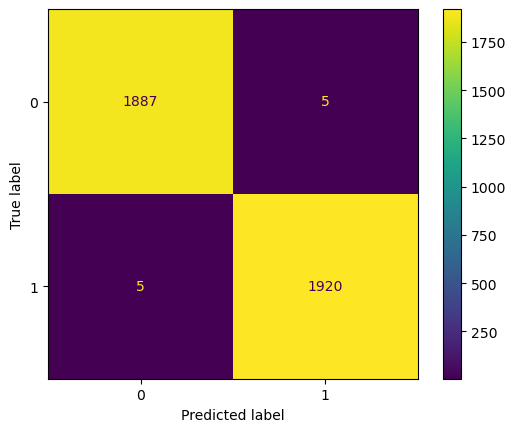

In [91]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

**Observation:**

The upper-left quadrant displays the number of true negatives: the number of opinions that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of opinions that the model misclassified as claims.

The lower-left quadrant displays the number of false negatives: the number of claims that the model misclassified as opinions.

The lower-right quadrant displays the number of true positives: the number of claims that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

As the above confusion matrix shows, this model does not produce any false negatives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.
<br> </br>

**Note:** We can create a helper function that can extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. We can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [92]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



**Observation:**

The classification report above shows that the random forest model scores were nearly perfect. The confusion matrix indicates that there were 10 misclassifications&mdash;five false postives and five false negatives.

#### **XGBoost**

Now, we'll evaluate the XGBoost model on the validation set.

In [93]:
#Evaluate XGBoost model
y_pred = xgb_cv.best_estimator_.predict(X_val_final)

In [94]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

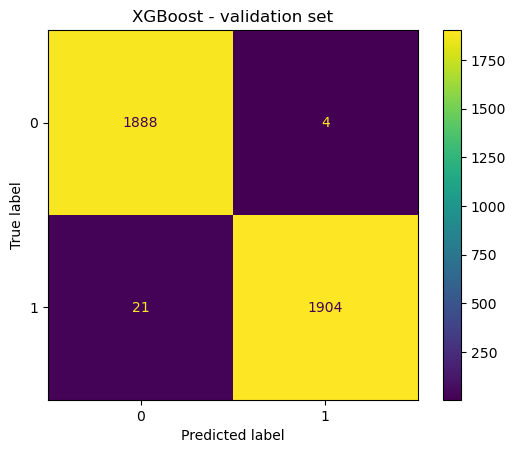

In [95]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('XGBoost - validation set');
plt.show()


In [96]:
# Create a classification report
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Observation:**

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, so it's important that the model be good at capturing all actual claim videos. The random forest model has a better recall score, and is therefore the champion model.


### **Use champion model to predict on test data**

Both random forest and XGBoost model architectures resulted in nearly perfect models. Nonetheless, in this case random forest performed a little bit better, so it is the champion model.

Nwe ow, use the champion model to predict on the test data.

In [97]:
# Use champion model to predict on test data
y_pred = rf_cv.best_estimator_.predict(X_test_final)

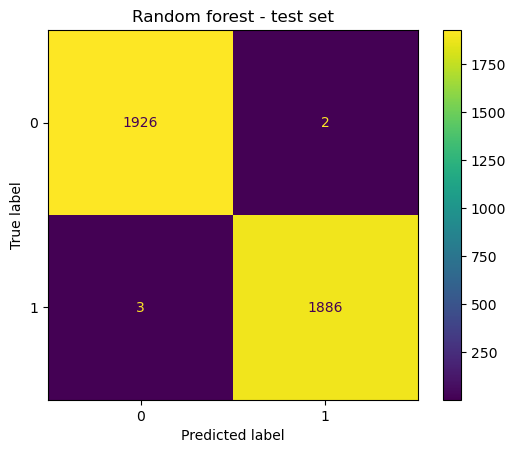

In [99]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

#### **Feature importances of champion model**

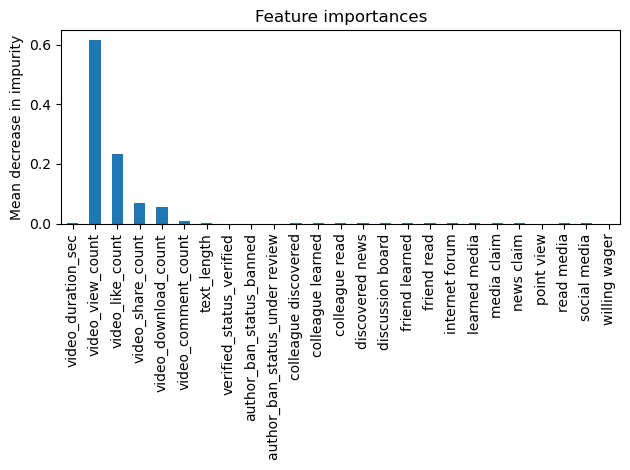

In [100]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

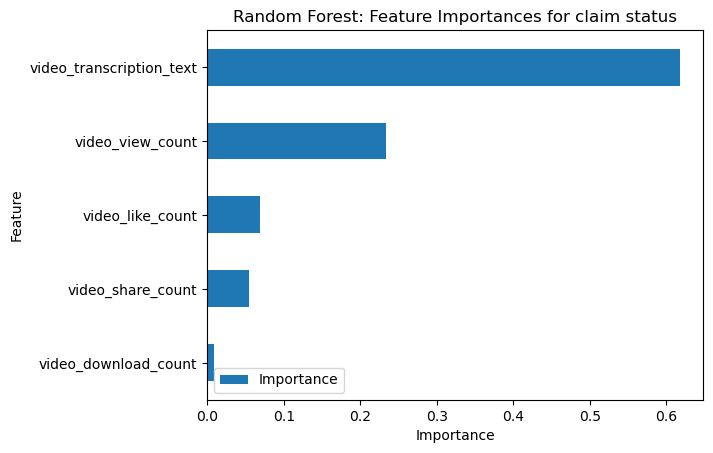

In [117]:
# Get feature importances
feat_impt = rf_cv.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf_cv.best_estimator_.feature_importances_, -2)[20:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for claim status", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

**Observation:**

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

### **Conclusion**


1. *Would you recommend using this model? Why or why not?*
Yes, one can recommend this model because it performed well on both the validation and test holdout data. Furthermore, both precision and F<sub>1</sub> scores were consistently high. The model very successfully classified claims and opinions.
</br>
2. *What was our model doing? Can you explain how it was making predictions?*
The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.
</br>
3. *Are there new features that you can engineer that might improve model performance?*
Because the model currently performs nearly perfectly, there is no need to engineer any new features.
</br>
4. *What features would you want to have that would likely improve the performance of your model?*
The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.